### importing libraries

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\machine\archive (2)\2015-street-tree-census-tree-data.csv")
df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,2015-08-18T00:00:00.000,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,2015-08-29T00:00:00.000,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,...,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,2015-08-22T00:00:00.000,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,2015-08-29T00:00:00.000,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


### we have 45 columns and some of them are not that importance so we need to reduce the dimensionality 🙈,  let's take a look on the data to gain information for cleaning 🥰

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

#### so there are an object columns , nan values on some columns 😭

In [5]:
df.nunique()

tree_id             683788
block_id            101390
created_at             483
tree_dbh               146
stump_diam             100
curb_loc                 2
status                   3
health                   3
spc_latin              132
spc_common             132
steward                  4
guards                   4
sidewalk                 2
user_type                3
problems               232
root_stone               2
root_grate               2
root_other               2
trunk_wire               2
trnk_light               2
trnk_other               2
brch_light               2
brch_shoe                2
brch_other               2
address             408701
postcode               191
zip_city                48
community board         59
borocode                 5
borough                  5
cncldist                51
st_assem                65
st_senate               26
nta                    188
nta_name               188
boro_ct               2152
state                    1
l

In [6]:
df.drop_duplicates()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,2015-08-18T00:00:00.000,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,2015-08-29T00:00:00.000,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,...,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,2015-08-22T00:00:00.000,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,2015-08-29T00:00:00.000,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


#### okay there is no duplicates 🥰

In [7]:
df.stump_diam.unique()

array([  0,  16,  15,  30,  10,  25,  17,   5,   1,  20,   3,  21,   4,
         7,   6,  23,  35,  12,  11,   9,  14,   8,  22,  19,  18,  27,
        24,  36,  41,  40,  13,  37,  44,  26,  38,  29,  48,  34,  52,
         2,  55,  31,  50,  72,  28, 100,  43,  32,  53,  70, 140,  39,
        33,  45,  47,  42,  90,  46,  58,  74,  54,  64,  57,  49,  77,
       118,  51, 109,  78,  67,  80, 134,  76,  79,  69,  56,  60,  61,
        96,  65, 131,  71,  89,  59,  63,  66,  87,  92,  99, 115,  62,
        84,  85, 107,  98,  86,  82, 104, 125, 120], dtype=int64)

In [8]:
df.curb_loc.unique()

array(['OnCurb', 'OffsetFromCurb'], dtype=object)

In [9]:
df.status.unique()

array(['Alive', 'Stump', 'Dead'], dtype=object)

In [10]:
df.spc_latin.nunique()

132

In [11]:
df.spc_common.nunique()

132

#### spc_common and spc_latin are the same columns they only tell you the name of the tree but the common one and the latin , so one of them is enough 🤗

###  


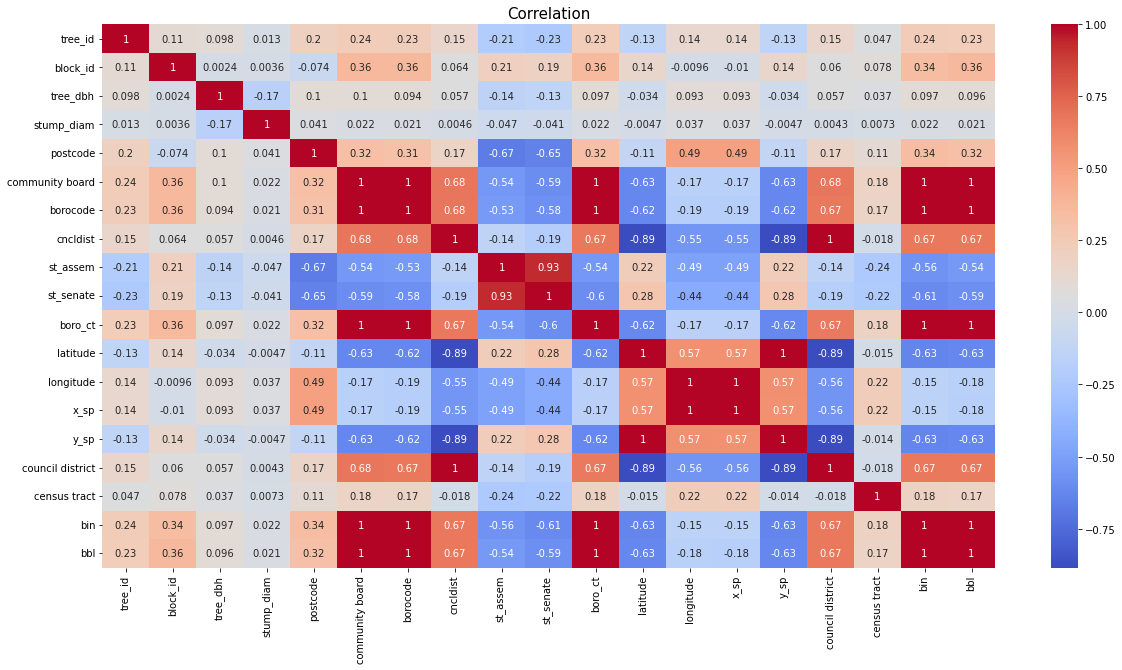

In [12]:
co = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(co,annot=True,cmap='coolwarm')
plt.title('Correlation',fontsize=15)
plt.show()

### A correlation graph visualize the relationships between numeric columns in a dataset 🔢, helping to identify patterns of dependency among variables. It clarifies the degree and direction of linear association, with positive values indicating a positive relationship↗️, negative values representing a negative relationship↙️, and values close to zero indicating weak or no linear correlation .                                                                                                    For instance, consider the robust positive correlation observed between "x_sp" and "longitude" .. as their corelation is eqaul to 1

In [13]:
df.shape

(683788, 45)

In [14]:
df = df.drop(["tree_id","block_id","created_at","spc_latin","user_type","state","address","zip_city"],axis=1)

#### "zip_code" and "zip_city" both represent city codes, with one being in string format and the other in integer format. Given this redundancy, retaining the integer-based zip code is sufficient.
#### The "user_type" column denotes the category of user responsible for collecting tree point data. As this information holds no significance for our analysis, we have decided to drop this column from our dataset👻.

In [15]:
df = df.loc[(df.tree_dbh >= 0)|(df.stump_diam>=0)]

In [16]:
df['status'] = df['status'].replace('Alive',1).replace('Dead',1).replace('Stump',2)

In [17]:
miss_n = df.isnull().sum()
miss_n[0:df.shape[1]]

tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
postcode                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
latitude                0
longitude               0
x_sp                    0
y_sp                    0
council district     6519
census tract         6519
bin                  9559
bbl                  9559
dtype: int64

In [18]:
#df.problems.unique()
df['council district'].fillna(df['council district'].mean(),inplace=True)
df['census tract'].fillna(df['census tract'].mean(),inplace=True)
df['bin'].fillna(df['bin'].mean(),inplace=True)
df['bbl'].fillna(df['bbl'].mean(),inplace=True)
df.dropna(subset=['spc_common','problems','sidewalk','guards','health'], inplace=True)
miss_n = df.isnull().sum()
miss_n[0:df.shape[1]]

tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health              0
spc_common          0
steward             0
guards              0
sidewalk            0
problems            0
root_stone          0
root_grate          0
root_other          0
trunk_wire          0
trnk_light          0
trnk_other          0
brch_light          0
brch_shoe           0
brch_other          0
postcode            0
community board     0
borocode            0
borough             0
cncldist            0
st_assem            0
st_senate           0
nta                 0
nta_name            0
boro_ct             0
latitude            0
longitude           0
x_sp                0
y_sp                0
council district    0
census tract        0
bin                 0
bbl                 0
dtype: int64

In [19]:
df.shape

(652118, 37)

In [20]:
df

,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,problems,...,nta_name,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,3,0,OnCurb,1,Fair,red maple,None,None,NoDamage,None,...,Forest Hills,4073900,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,21,0,OnCurb,1,Fair,pin oak,None,None,Damage,Stones,...,Whitestone,4097300,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,3,0,OnCurb,1,Good,honeylocust,1or2,None,Damage,None,...,East Williamsburg,3044900,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,10,0,OnCurb,1,Good,honeylocust,None,None,Damage,Stones,...,East Williamsburg,3044900,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,21,0,OnCurb,1,Good,American linden,None,None,Damage,Stones,...,Park Slope-Gowanus,3016500,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,0,OnCurb,1,Good,pin oak,None,None,Damage,None,...,North Side-South Side,3051900,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,7,0,OnCurb,1,Good,Kentucky yellowwood,1or2,None,NoDamage,None,...,Forest Hills,4070700,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,12,0,OnCurb,1,Good,red maple,None,None,Damage,None,...,Westerleigh,5020100,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,9,0,OnCurb,1,Good,red maple,None,None,NoDamage,None,...,Mount Hope,2023502,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [21]:
df.columns

Index(['tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_common',
       'steward', 'guards', 'sidewalk', 'problems', 'root_stone', 'root_grate',
       'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light',
       'brch_shoe', 'brch_other', 'postcode', 'community board', 'borocode',
       'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name',
       'boro_ct', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [22]:
lb = LabelBinarizer()

for col in [ 'curb_loc', 'sidewalk', 'root_stone', 'root_grate',
       'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light',
       'brch_shoe', 'brch_other']:
    df[col] = lb.fit_transform(df[col])
    df[col] = df[col].astype('int')

In [23]:
df.dtypes

tree_dbh              int64
stump_diam            int64
curb_loc              int32
status                int64
health               object
spc_common           object
steward              object
guards               object
sidewalk              int32
problems             object
root_stone            int32
root_grate            int32
root_other            int32
trunk_wire            int32
trnk_light            int32
trnk_other            int32
brch_light            int32
brch_shoe             int32
brch_other            int32
postcode              int64
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct               int64
latitude            float64
longitude           float64
x_sp                float64
y_sp                float64
council district    float64
census tract        float64
bin                 

In [24]:
df.nta.unique()
#df.nta_name.unique()

array(['QN17', 'QN49', 'BK90', 'BK37', 'MN14', 'MN15', 'SI14', 'BK26',
       'QN72', 'SI54', 'BK69', 'BK81', 'BK29', 'BK42', 'QN25', 'BK68',
       'MN40', 'MN12', 'SI25', 'QN60', 'BK46', 'MN27', 'QN20', 'BX17',
       'SI36', 'BX41', 'SI45', 'BK17', 'MN50', 'MN24', 'SI24', 'BK44',
       'QN62', 'SI01', 'BX06', 'SI48', 'MN20', 'MN23', 'BK33', 'MN09',
       'QN28', 'BX43', 'BX36', 'BK19', 'BK31', 'BK43', 'QN51', 'BK96',
       'QN22', 'QN15', 'BK77', 'QN12', 'BX40', 'QN03', 'QN18', 'QN34',
       'BK64', 'BK28', 'BK95', 'BX62', 'QN27', 'MN31', 'QN70', 'MN21',
       'QN53', 'QN10', 'BK41', 'QN41', 'QN48', 'BK76', 'SI05', 'BX28',
       'BK58', 'BK25', 'MN17', 'QN19', 'MN25', 'MN11', 'QN31', 'BK88',
       'QN08', 'QN66', 'QN46', 'QN42', 'QN06', 'QN23', 'BX01', 'MN19',
       'BX26', 'QN45', 'BK61', 'BK73', 'BX49', 'QN71', 'QN57', 'BK82',
       'BK78', 'BK79', 'BK60', 'MN28', 'MN13', 'BK34', 'BK75', 'BX08',
       'QN54', 'SI07', 'BX52', 'BK45', 'MN32', 'BX03', 'QN50', 'BK35',
      

In [25]:
df = df.drop(['nta_name','borough','problems'],axis=1)

In [26]:
df

,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,root_stone,...,nta,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,3,0,1,1,Fair,red maple,None,None,1,0,...,QN17,4073900,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,21,0,1,1,Fair,pin oak,None,None,0,1,...,QN49,4097300,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,3,0,1,1,Good,honeylocust,1or2,None,0,0,...,BK90,3044900,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,10,0,1,1,Good,honeylocust,None,None,0,1,...,BK90,3044900,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,21,0,1,1,Good,American linden,None,None,0,1,...,BK37,3016500,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,0,1,1,Good,pin oak,None,None,0,0,...,BK73,3051900,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,7,0,1,1,Good,Kentucky yellowwood,1or2,None,1,0,...,QN17,4070700,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,12,0,1,1,Good,red maple,None,None,0,0,...,SI07,5020100,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,9,0,1,1,Good,red maple,None,None,1,0,...,BX41,2023502,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [27]:
object_df = [x for x in df.columns if df[x].dtype == 'object']
object_df.remove('nta')
object_df.remove('spc_common')
#object_df = ['health', 'steward', 'guards']
encoded = pd.get_dummies(df[object_df])
df = pd.concat([df.drop(object_df,axis=1),encoded],axis=1)
df

,tree_dbh,stump_diam,curb_loc,status,spc_common,sidewalk,root_stone,root_grate,root_other,trunk_wire,...,health_Good,health_Poor,steward_1or2,steward_3or4,steward_4orMore,steward_None,guards_Harmful,guards_Helpful,guards_None,guards_Unsure
0,3,0,1,1,red maple,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,21,0,1,1,pin oak,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,0,1,1,honeylocust,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,10,0,1,1,honeylocust,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,21,0,1,1,American linden,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,0,1,1,pin oak,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
683784,7,0,1,1,Kentucky yellowwood,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
683785,12,0,1,1,red maple,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
683786,9,0,1,1,red maple,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [28]:
df[encoded.columns] = df[encoded.columns].astype(int)

In [29]:
encoded

,health_Fair,health_Good,health_Poor,steward_1or2,steward_3or4,steward_4orMore,steward_None,guards_Harmful,guards_Helpful,guards_None,guards_Unsure
0,1,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
683783,0,1,0,0,0,0,1,0,0,1,0
683784,0,1,0,1,0,0,0,0,0,1,0
683785,0,1,0,0,0,0,1,0,0,1,0
683786,0,1,0,0,0,0,1,0,0,1,0


In [30]:
df= df.drop(['steward_None','guards_None'],axis=1)

In [31]:
df.shape

(652118, 40)

In [32]:
df

,tree_dbh,stump_diam,curb_loc,status,spc_common,sidewalk,root_stone,root_grate,root_other,trunk_wire,...,bbl,health_Fair,health_Good,health_Poor,steward_1or2,steward_3or4,steward_4orMore,guards_Harmful,guards_Helpful,guards_Unsure
0,3,0,1,1,red maple,1,0,0,0,0,...,4.022210e+09,1,0,0,0,0,0,0,0,0
1,21,0,1,1,pin oak,0,1,0,0,0,...,4.044750e+09,1,0,0,0,0,0,0,0,0
2,3,0,1,1,honeylocust,0,0,0,0,0,...,3.028870e+09,0,1,0,1,0,0,0,0,0
3,10,0,1,1,honeylocust,0,1,0,0,0,...,3.029250e+09,0,1,0,0,0,0,0,0,0
4,21,0,1,1,American linden,0,1,0,0,0,...,3.010850e+09,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,0,1,1,pin oak,0,0,0,0,0,...,3.023690e+09,0,1,0,0,0,0,0,0,0
683784,7,0,1,1,Kentucky yellowwood,1,0,0,0,0,...,4.031810e+09,0,1,0,1,0,0,0,0,0
683785,12,0,1,1,red maple,0,0,0,0,0,...,5.004080e+09,0,1,0,0,0,0,0,0,0
683786,9,0,1,1,red maple,1,0,0,0,0,...,2.028120e+09,0,1,0,0,0,0,0,0,0
